<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yasaei</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Seyyed Amirmahdi Sadrzadeh

**Student ID**: 401102015

#Implementing PCA from Scratch and Using it with K-Means

## Introduction and Purpose

In this exercise, you will:

1. **Implement Principal Component Analysis (PCA) from scratch** using NumPy (without relying on `sklearn.decomposition.PCA`).
2. Apply your custom PCA to a dataset to reduce its dimensionality.
3. Run **K-Means clustering** on both the original data and the PCA-reduced data.
4. Compare the clustering results and visualize them.

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that finds linear combinations of features (principal components) that explain the most variance in the data. By implementing it yourself, you will gain a deeper understanding of the underlying math (e.g., covariance matrix, eigenvalues, eigenvectors).

After reducing the data dimensions with your custom PCA, you will run K-Means clustering and evaluate whether PCA helps or hinders the clustering performance.



## Part 1: Data Loading and Exploration

**Tasks:**  
- Load the Iris dataset using `sklearn.datasets.load_iris`.
- Print the shape of `X` and a few samples to understand the data.

**Question:** The Iris dataset has 4 features and 3 classes. Without looking at the labels, do you expect PCA to help cluster the data better in fewer dimensions?

asnwer:

PCA is likely to help cluster the data better in fewer dimensions because some features (like petal length and petal width) may be highly correlated, meaning fewer dimensions might capture most of the variance. Also reducing dimensions can remove noise and make clusters more distinguishable.


In [1]:
# TODO: Load Iris dataset and print basic info
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
print("Shape of X:", X.shape)
print("First 5 rows:\n", X[:5])

Shape of X: (150, 4)
First 5 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Part 2: Data Preprocessing (Scaling)

PCA and K-Means are sensitive to feature scales. Standardize the data before applying PCA.

**Tasks:**  
- Scale the data using StandardScaler.
- Print the mean and variance of the scaled data to confirm.

**Hint:** Use `StandardScaler` from `sklearn.preprocessing`.


In [2]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Mean after scaling:", X_scaled.mean(axis=0))
print("Std after scaling:", X_scaled.std(axis=0))


Mean after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std after scaling: [1. 1. 1. 1.]


## Part 3: Implementing PCA from Scratch

We will:
1. Compute the covariance matrix of the scaled data.
2. Find its eigenvalues and eigenvectors.
3. Sort eigenvectors by their eigenvalues in descending order.
4. Select the top `n_components` principal components.
5. Project the data onto these principal components.

**Tasks:**
Implement a `my_pca(X, n_components)` function that:
 - Computes the covariance matrix.
 - Performs eigen decomposition.
 - Sorts eigenvectors by eigenvalues.
 - Returns the projected data and the selected eigenvectors, as well as explained variance ratio.

**Question:** Why do we pick the eigenvectors with the largest eigenvalues as the principal components?

answer:

This is because eigenvalues represent the variance captured by their corresponding eigenvectors. So larger eigenvalues mean more variance is explained, making those eigenvectors the most important directions for dimensionality reduction.

In [3]:
# TODO: Implement PCA from scratch

def my_pca(X, n_components=2):
    # Step 1: Compute covariance matrix: shape (D, D)
    cov_matrix = np.cov(X.T)

    # Step 2: Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 3: Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Step 4: Select top n_components
    selected_eigenvectors = eigenvectors[:, :n_components]
    selected_eigenvalues = eigenvalues[:n_components]

    # Step 5: Project data: Z = X * selected_eigenvectors
    Z = X @ selected_eigenvectors

    # Compute explained variance ratio
    explained_variance_ratio = selected_eigenvalues / np.sum(eigenvalues)

    return Z, selected_eigenvectors, explained_variance_ratio

# Test your my_pca function
Z, eigvecs, exp_var_ratio = my_pca(X_scaled, n_components=2)
print("Shape of projected data:", Z.shape)
print("Explained variance ratio:", exp_var_ratio)

Shape of projected data: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]


## Part 4: Comparing K-Means Clustering Before and After PCA

We will:
1. Run K-Means clustering on the original scaled data.
2. Run K-Means clustering on the PCA-reduced data (from `my_pca`).

**Tasks:**  
- Perform K-Means with `k=3` (since Iris has 3 classes).
- Extract cluster labels from both runs.

**Hint:** Use `KMeans` from `sklearn.cluster`.

**Question:** Do you think clustering on just the first two principal components will yield a similar or better ARI score than using all features?

answer:

Since PCA reduces noise and retains the most informative features, it is a good way to save most of the important part of data and reduce the computational time.

In [4]:
# TODO: K-Means on original scaled data
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)

# TODO: K-Means on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(Z)

## Part 5: Evaluating the Clusters

Use Adjusted Rand Index (ARI) to see how well clusters align with the true labels.

**Tasks:**  
- Compute ARI for both sets of labels against `y`.
- Print and compare.

**Hint:** `from sklearn.metrics import adjusted_rand_score`.


In [5]:
# TODO: Compute ARI scores
from sklearn.metrics import adjusted_rand_score

ari_original = adjusted_rand_score(y, labels_original)
ari_pca = adjusted_rand_score(y, labels_pca)
print("ARI (Original):", ari_original)
print("ARI (PCA):", ari_pca)

ARI (Original): 0.432804702527474
ARI (PCA): 0.432804702527474


## Part 6: Visualizing the PCA Results

Visualize the PCA-reduced data and the clusters.

**Tasks:**  
- Plot `Z[:,0]` vs `Z[:,1]` and color by `labels_pca`.
- (Optional) Also plot true labels to compare how well the clusters match.

**Hint:** Use `matplotlib.pyplot.scatter`.


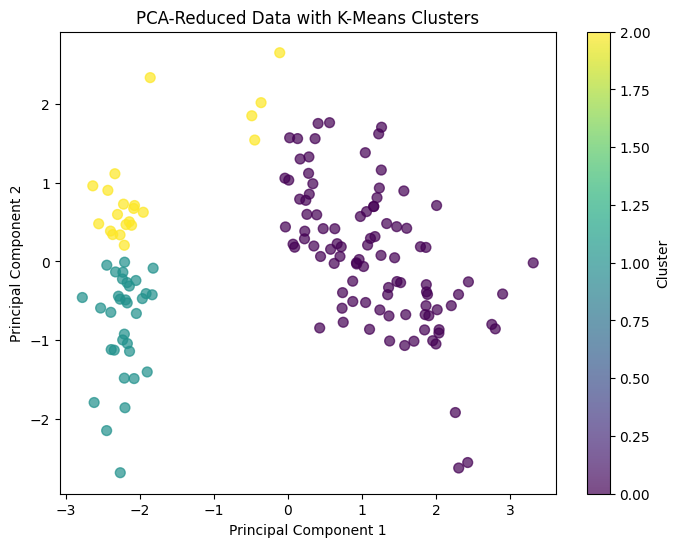

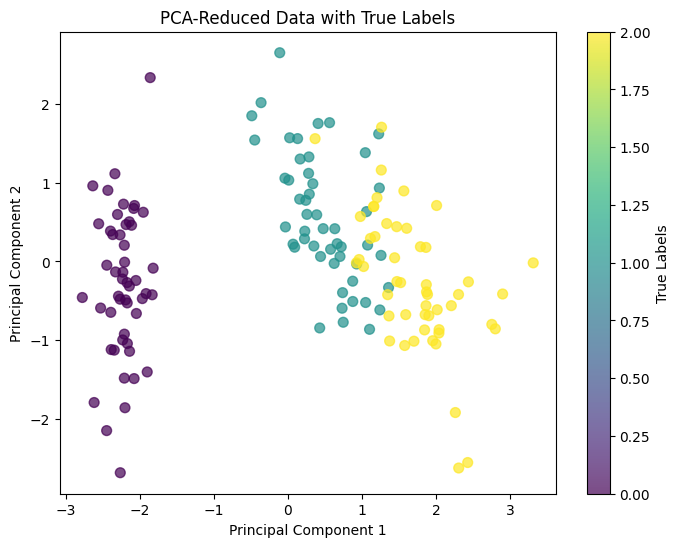

In [6]:
# TODO: Visualize PCA results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.7)
plt.title("PCA-Reduced Data with K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("PCA-Reduced Data with True Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Labels")
plt.show()
